In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/vacancies.csv", index_col=0)

# Data cleaning

In [2]:
df["skills"] = df["skills"].replace({
    "machine learning": "ML",
    "Artificial Intelligence": "AI",
    " ШІ": "AI",
    "AI ": "AI",
    "ООП": "OOP"
}, regex=True)

mask = (
        (df["location"].str.len() > 15)
        & (df["location"].str.contains("We're"))
)
df.loc[mask, "location"] = "unknown"
df

,company,description,location,experience,skills
title,,,,,
Junior Python Developer,GT-Protocol,Are you a skilled Junior Python Developer eage...,"Одеса, віддалено",<1,"Python, SQL, API, docker, AI, ML, Flask, NoSQL..."
Math + Python Developer,Numerical Technologies Ltd,Joining Numerical Technologies is a unique cha...,Київ,<1,"Python, ML, algorithms, Math, Data Structures,..."
Junior Python Developer in Test (Apps),Ajax Systems,Ajax Systems — розробник і виробник систем без...,Київ,<1,"Python, GIT, Linux, Pytest, Selenium, OOP, gRP..."
Junior Python Developer in Test (CSA),Ajax Systems,"Ми — Ajax Systems, створюємо системи безпеки т...",Львів,<1,"Python, GIT, SQL, docker, Linux, NoSQL, asynci..."
Викладач Штучного Інтелекту та Python (Блок Ші),Комп'ютерная Академія ШАГ,Міжнародна Академія IT STEP шукає викладача дл...,віддалено,<1,"Python, AI"
...,...,...,...,...,...
Senior Python Software Engineer with Data Science experience,Binariks,About the project: We specialize in providing ...,за кордоном,5+,"Python, ML, SOLID"
Lead Python Software Engineer (KYC),SoftConstruct Ukraine,SoftConstruct Ukraine is a large product compa...,Київ,5+,"Python, GIT, SQL, REST, docker, Django, Postgr..."
Sr. Back End Developer,MWDN,Requirements:\n— 5 years of professional exper...,віддалено,5+,"Python, docker, AWS, js, ML, react, backend, Node"


# Frequency technologies
The plot shows what and how much technology is used in vacancies.

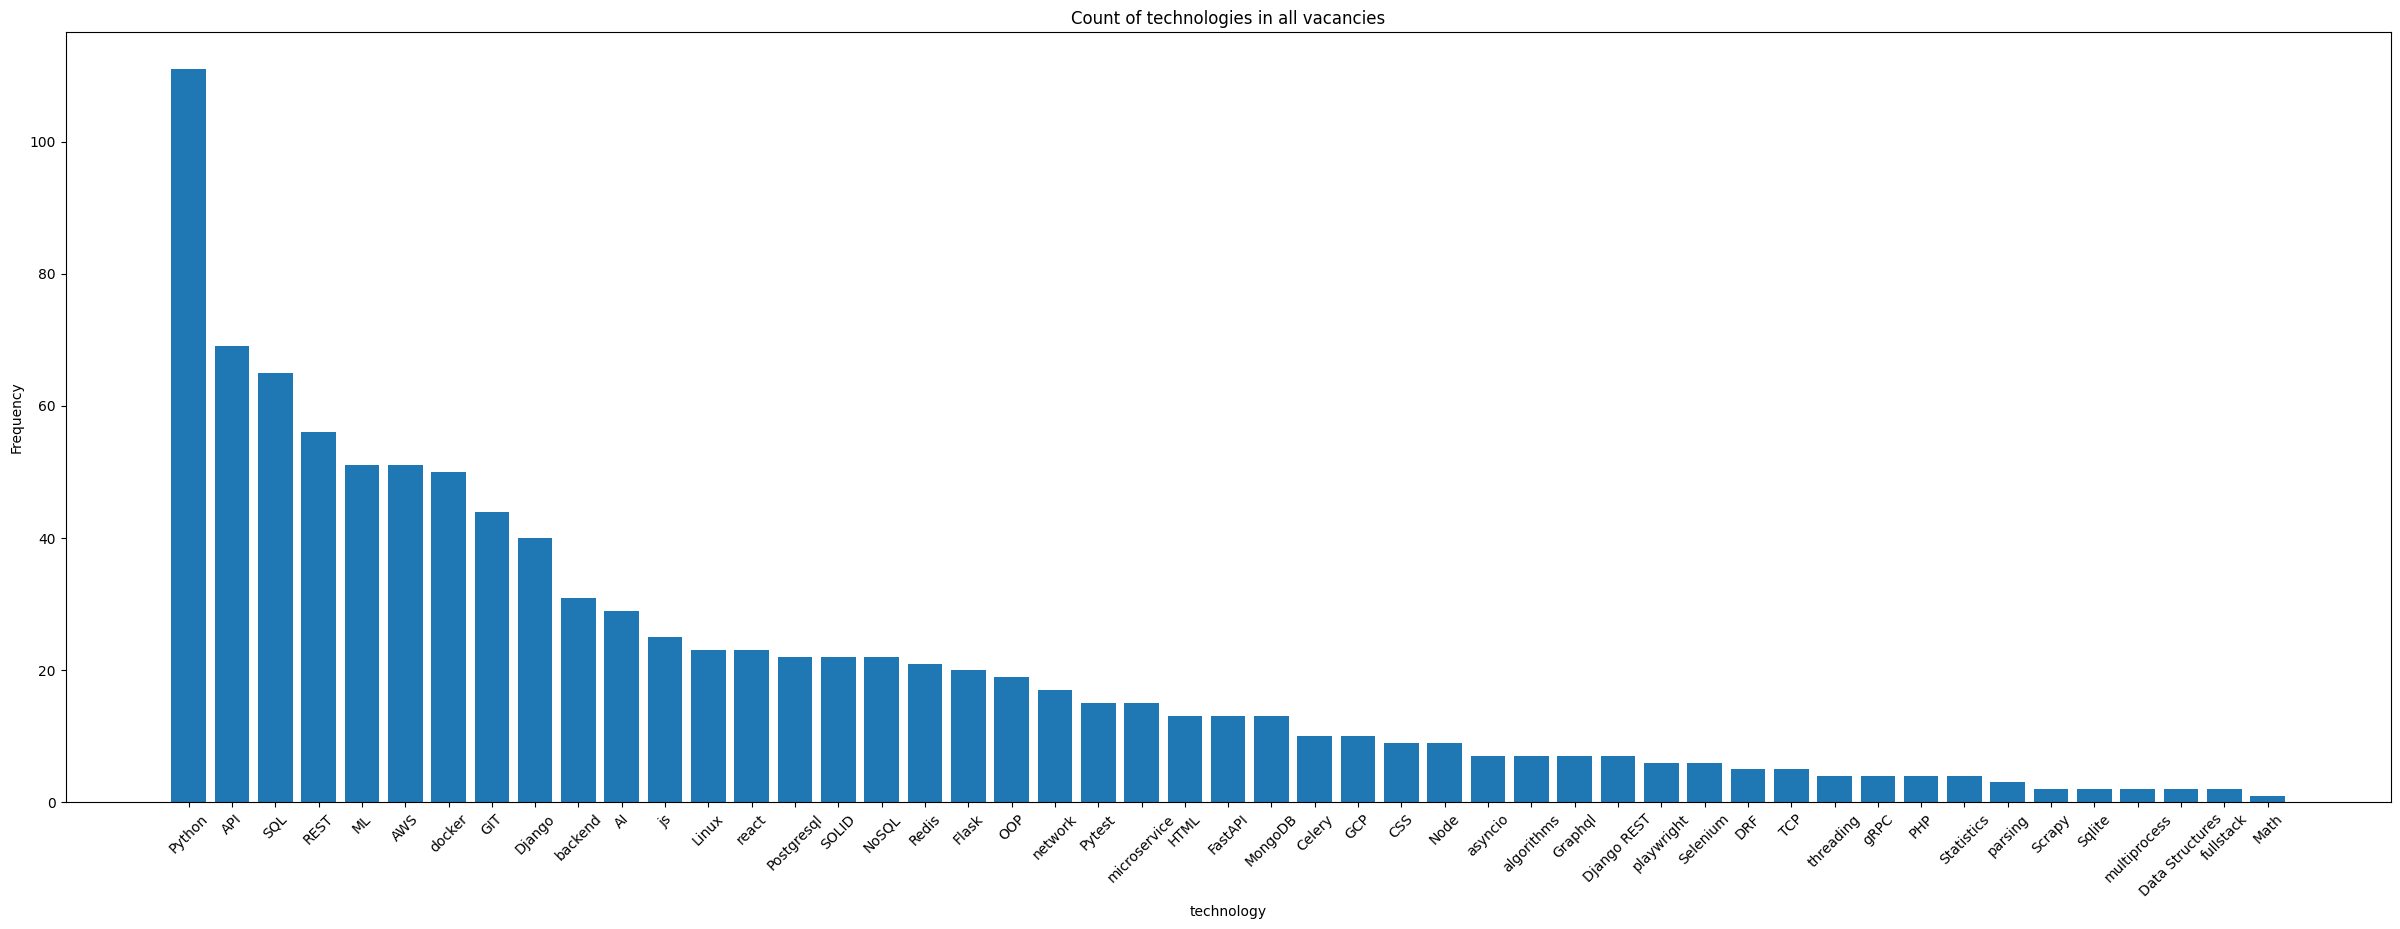

In [52]:
skills_list = df["skills"].str.split(", ")
technologies_count = pd.Series(np.concatenate(skills_list.iloc[:].values)).value_counts()

plt.figure(figsize=(30, 10))
plt.bar(technologies_count.index, technologies_count)
plt.xlabel("technology")
plt.ylabel("Frequency")
plt.title("Count of technologies in all vacancies")
plt.xticks(rotation=45)
plt.show()

# Frequency technologies with different experience
The plot shows the same technologies but categorized by exp

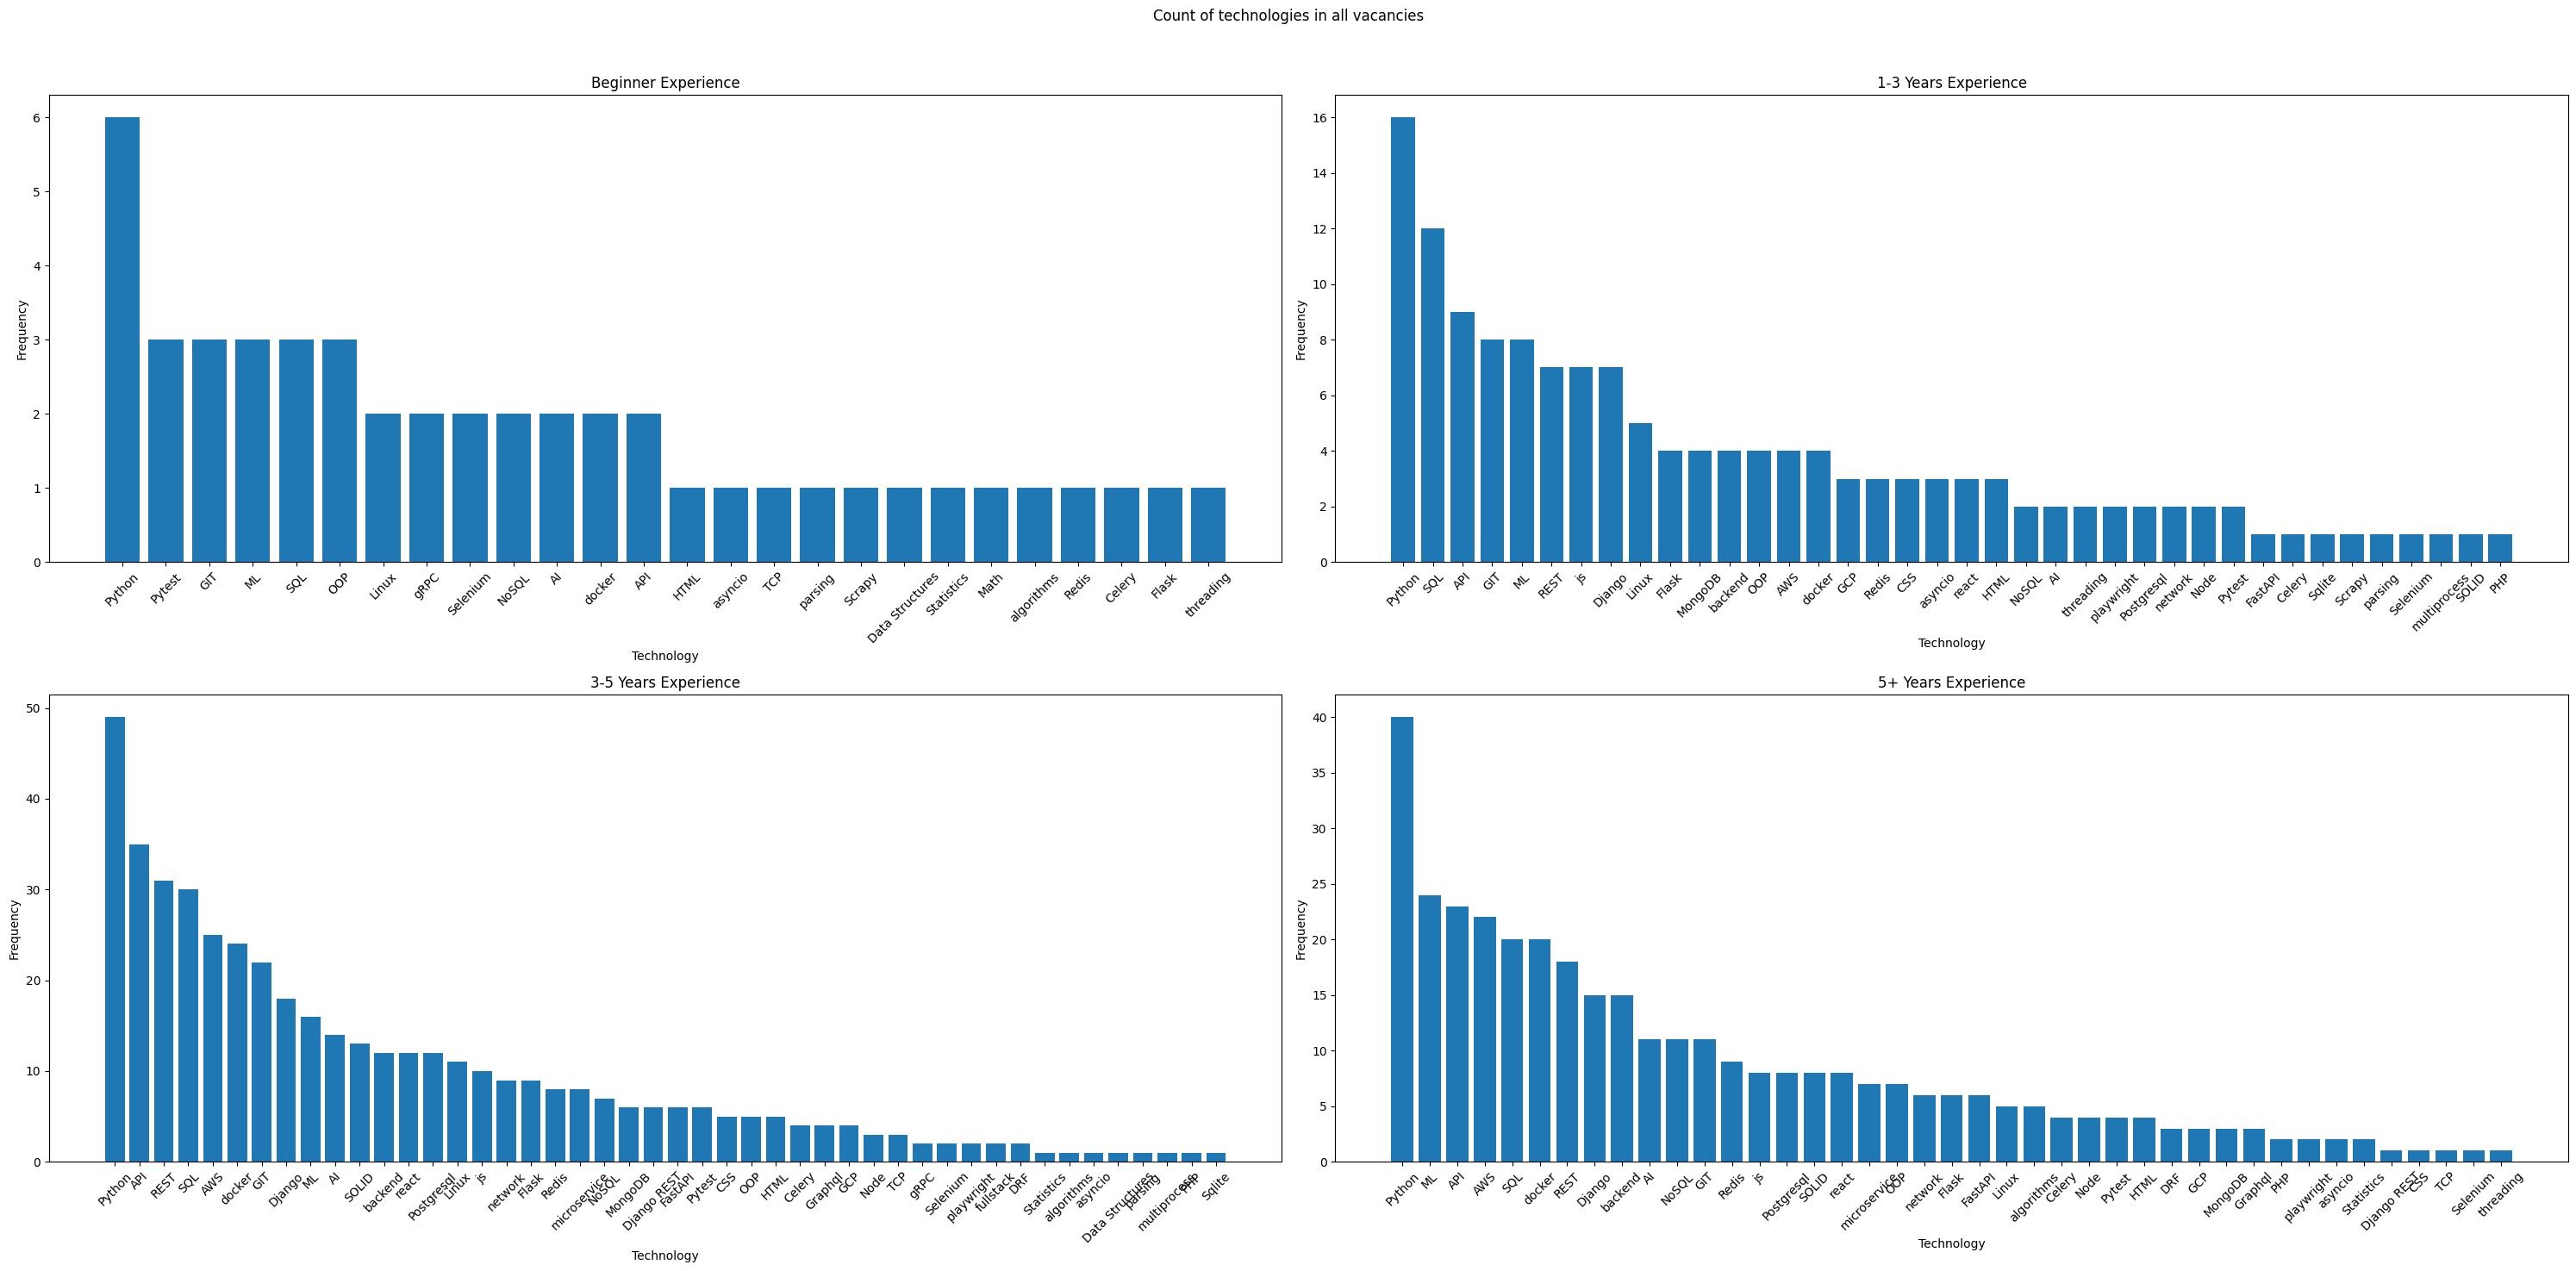

In [53]:
beginner_skills_list = df.loc[df["experience"] == "<1", "skills"].str.split(", ")
beginner_technologies = pd.Series(np.concatenate(beginner_skills_list.iloc[:].values)).value_counts()

one_plus_exp_skills_list = df.loc[df["experience"] == "1…3", "skills"].str.split(", ")
one_plus_exp_technologies = pd.Series(np.concatenate(one_plus_exp_skills_list.iloc[:].values)).value_counts()

three_plus_exp_skills_list = df.loc[df["experience"] == "3…5", "skills"].str.split(", ")
three_plus_exp_technologies = pd.Series(np.concatenate(three_plus_exp_skills_list.iloc[:].values)).value_counts()

five_plus_exp_skills_list = df.loc[df["experience"] == "5+", "skills"].str.split(", ")
five_plus_exp_technologies = pd.Series(np.concatenate(five_plus_exp_skills_list.iloc[:].values)).value_counts()

fig, axes = plt.subplots(2, 2, figsize=(30, 15))
fig.suptitle("Count of technologies in all vacancies")

axes[0, 0].bar(beginner_technologies.index, beginner_technologies)
axes[0, 0].set_title("Beginner Experience")
axes[0, 0].set_xlabel("Technology")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(one_plus_exp_technologies.index, one_plus_exp_technologies)
axes[0, 1].set_title("1-3 Years Experience")
axes[0, 1].set_xlabel("Technology")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(three_plus_exp_technologies.index, three_plus_exp_technologies)
axes[1, 0].set_title("3-5 Years Experience")
axes[1, 0].set_xlabel("Technology")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(five_plus_exp_technologies.index, five_plus_exp_technologies)
axes[1, 1].set_title("5+ Years Experience")
axes[1, 1].set_xlabel("Technology")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Location
The graph shows which cities are found in vacancies and how much.

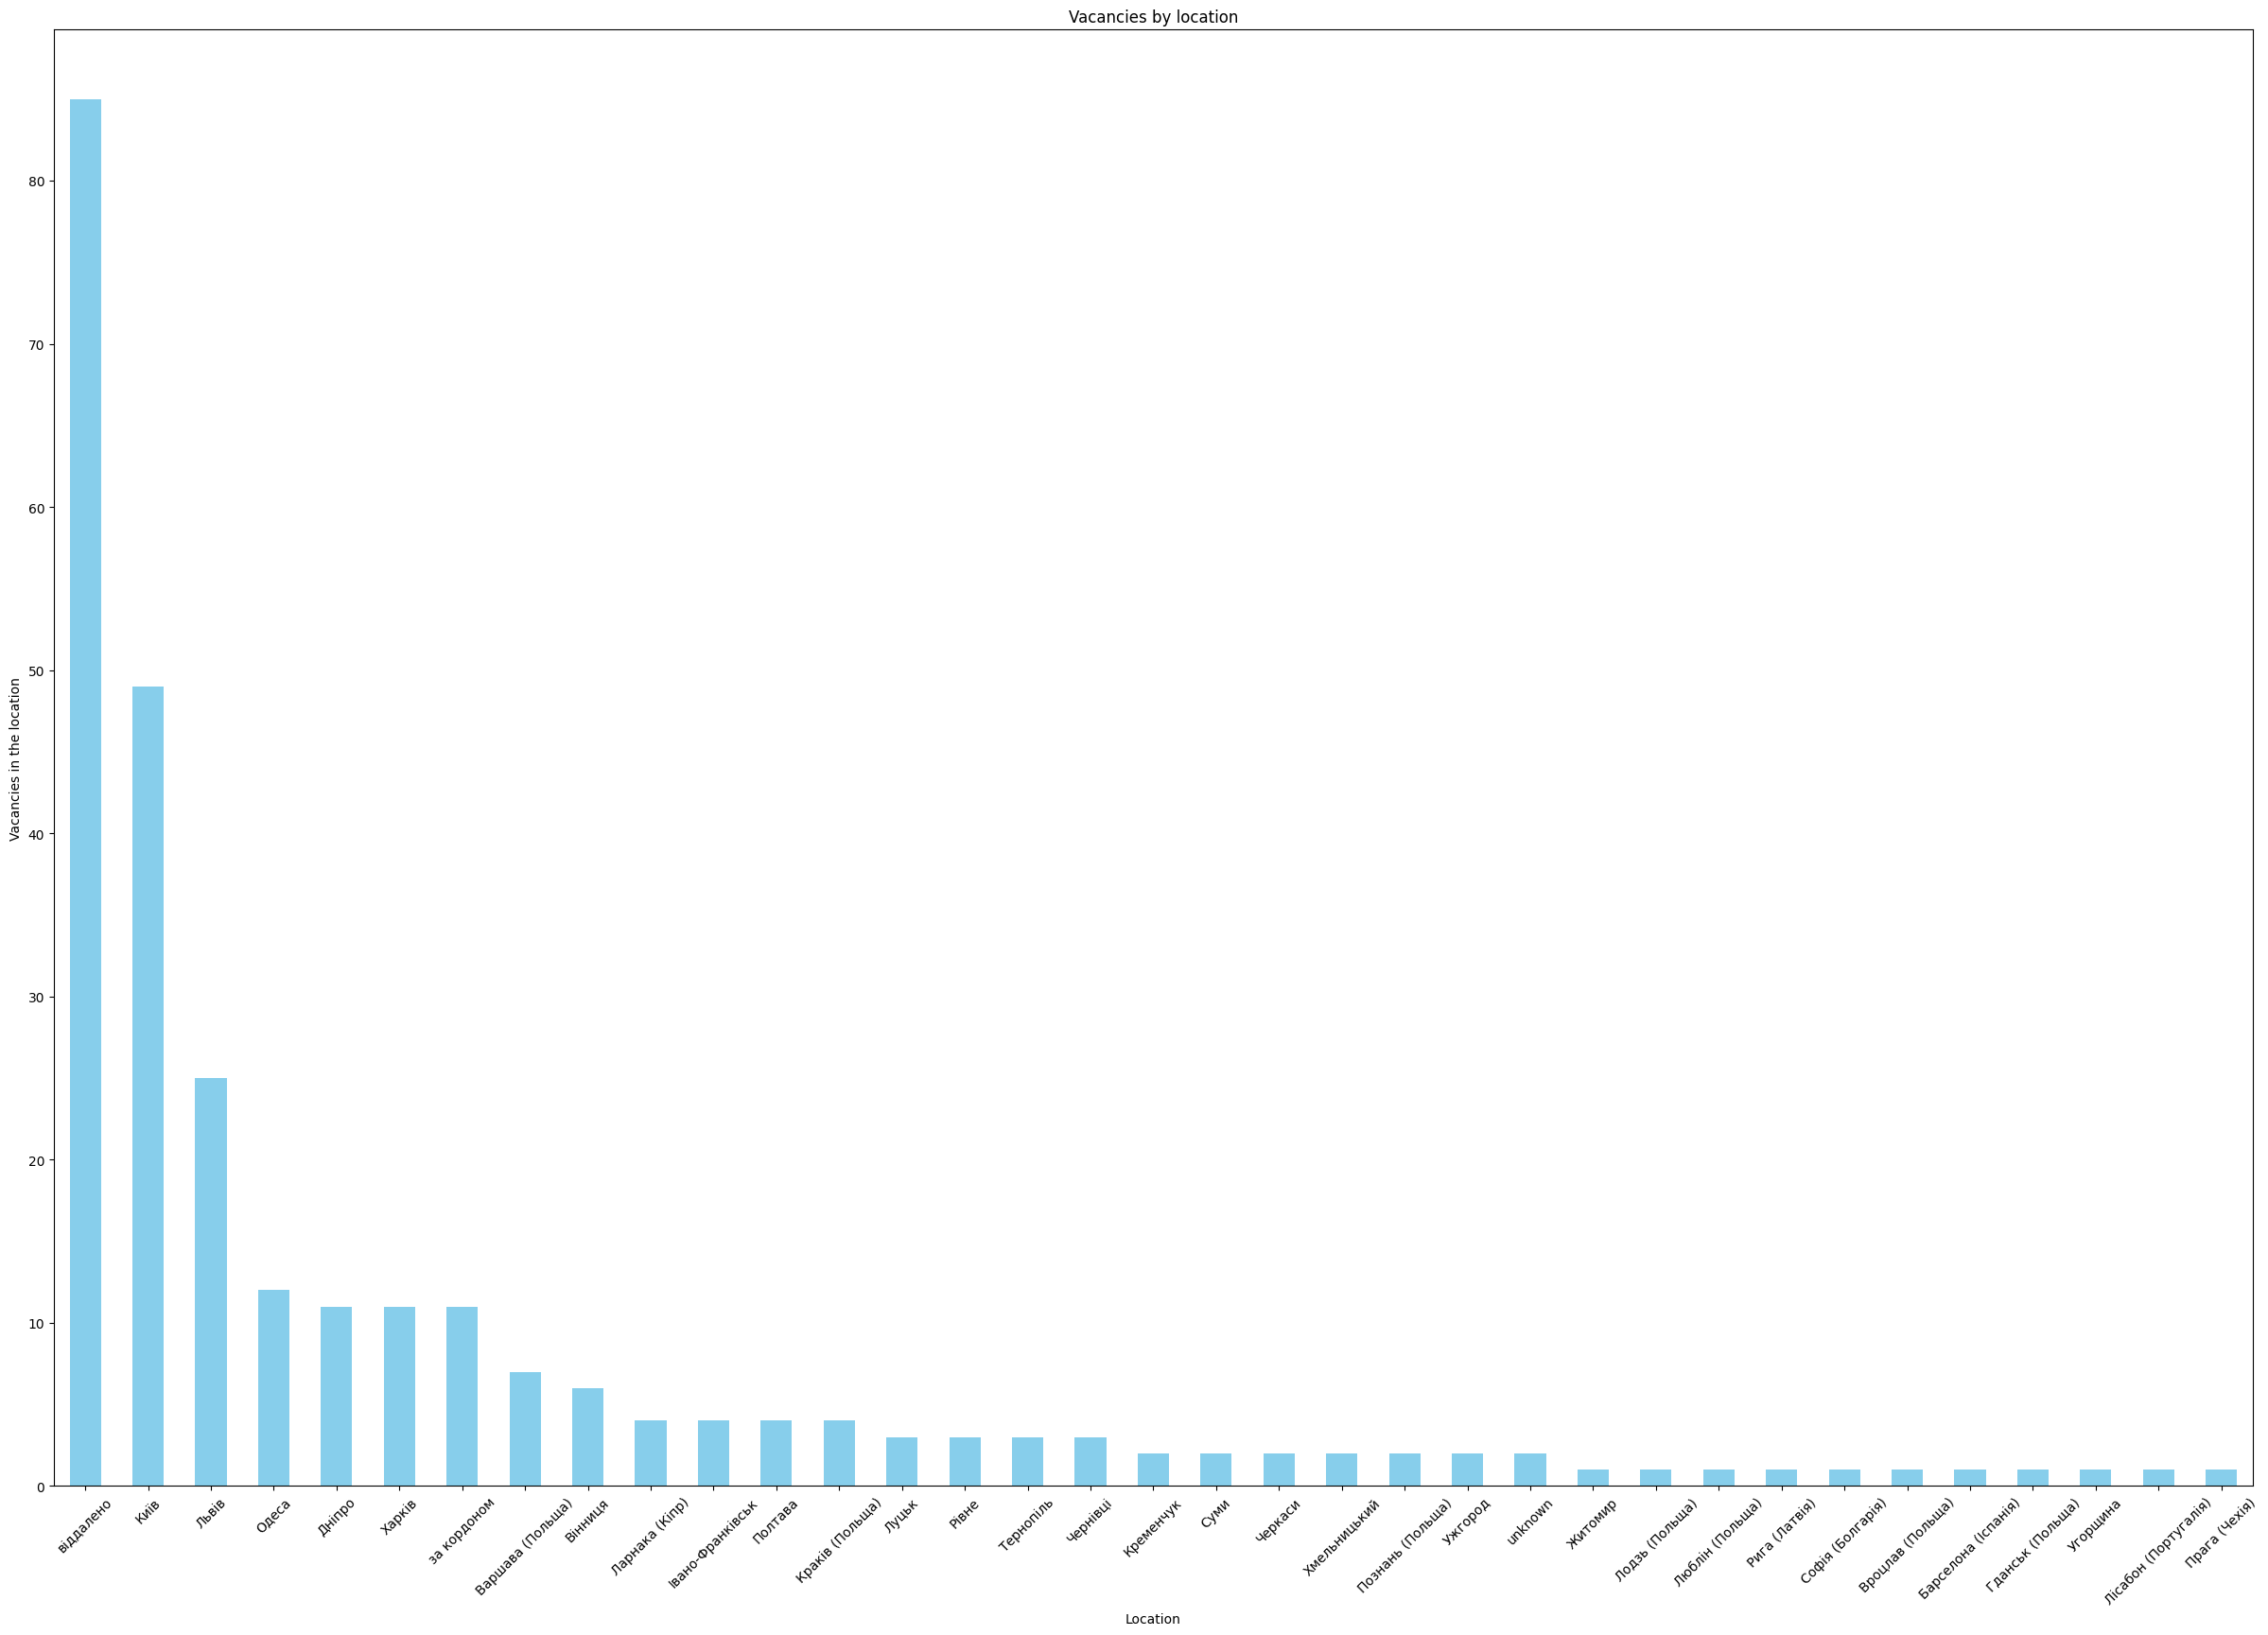

In [54]:
locations = df["location"].str.split(", ")
locations_count = (
    pd.Series(
        np.concatenate(locations.iloc[:].values)
    ).value_counts()
)

plt.figure(figsize=(30, 20))
locations_count.plot(kind="bar", color="skyblue")
plt.xlabel("Location")
plt.ylabel("Vacancies in the location")
plt.title("Vacancies by location")
plt.xticks(rotation=45)
plt.show()

# Vacancies in companies
This plot shows 10 companies with the most vacancies.

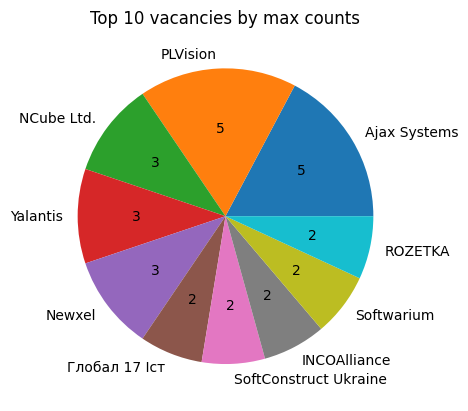

In [9]:
vacancies_in_company = df["company"].value_counts().head(10)
plt.pie(
    vacancies_in_company,
    labels=vacancies_in_company.index,
    autopct=lambda p: "{:.0f}".format(p * sum(vacancies_in_company) / 100),
)

plt.title("Top 10 vacancies by max counts")
plt.show()

# Vacancies categorized by exp
This plot shows how much vacancies for every experience category

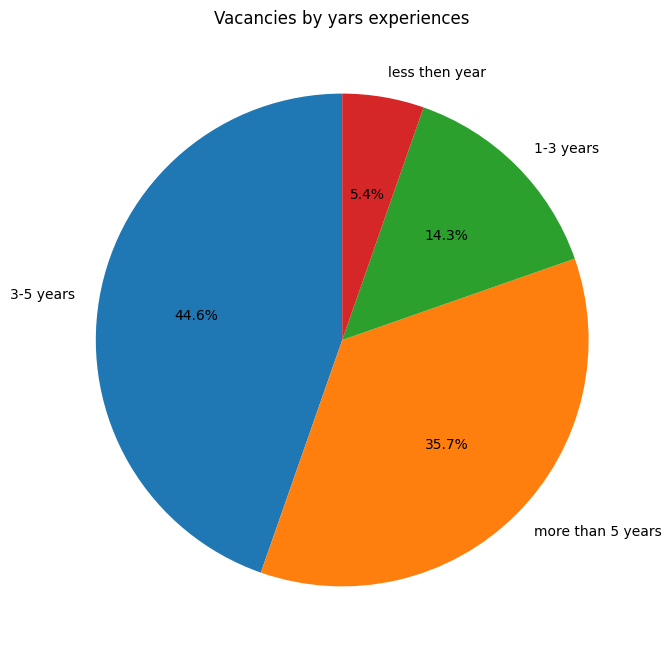

In [10]:
exps = ["less then year", "1-3 years", "more than 5 years", "3-5 years"]
plt.figure(figsize=(8, 8))
plt.pie(
    df["experience"].value_counts(),
    labels=exps[::-1],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Vacancies by yars experiences")
plt.show()